In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

from sklearn import preprocessing, decomposition, metrics
from sklearn.cluster import KMeans, DBSCAN

from sklearn.manifold import TSNE

#On importe des fonctions de visualitions pour notre ACP
from functions import *

In [2]:
#On importe l'ensemble des jeux de données fournis par OLIST
data_customers = pd.read_csv("data\olist_customers_dataset.csv")
data_geo = pd.read_csv("data\olist_geolocation_dataset.csv")

data_orders = pd.read_csv("data\olist_orders_dataset.csv")
data_orders_items = pd.read_csv("data\olist_order_items_dataset.csv")
data_paiement = pd.read_csv("data\olist_order_payments_dataset.csv")
data_review = pd.read_csv("data\olist_order_reviews_dataset.csv")

data_products = pd.read_csv("data\olist_products_dataset.csv")
data_products_translation = pd.read_csv("data\product_category_name_translation.csv")

data_sellers = pd.read_csv("data\olist_sellers_dataset.csv")

# Modèle de la base de données Olist
<img src="https://i.imgur.com/HRhd2Y0.png" alt="Drawing" style="width: 900px;"/>

## Data customers
**customer_id** : each order has a unique customer_id
<br/> **customer_unique_id** : unique identifier of a customer (nb of customers)
<br/> **'customer_zip_code_prefix** : first five digits of customer zip code
<br/> **customer_city** : customer city name
<br/> **'customer_state** : customer state

In [3]:
data_customers.notnull().sum()

customer_id                 99441
customer_unique_id          99441
customer_zip_code_prefix    99441
customer_city               99441
customer_state              99441
dtype: int64

## Data orders
**order_id** : unique identifier of the order
<br/> **customer_id** : each order has a unique customer_id
<br/> **'order_status** : reference to the order status (delivered, shipped, etc)
<br/> **order_purchase_timestamp** : shows the purchase timestamp
<br/> **'order_approved_at** : shows the payment approval timestamp
<br/> **'order_delivered_carrier_date** : shows the order posting timestamp
<br/> **order_delivered_customer_date** : shows the actual order delivery date to the customer
<br/> **'order_estimated_delivery_date** : shows the estimated delivery date that was informed to customer at the purchase

In [4]:
data_orders.notnull().count()

order_id                         99441
customer_id                      99441
order_status                     99441
order_purchase_timestamp         99441
order_approved_at                99441
order_delivered_carrier_date     99441
order_delivered_customer_date    99441
order_estimated_delivery_date    99441
dtype: int64

## Data orders items
**order_id** : order unique identifier
<br/> **order_item_id** : number of items included in the same order
<br/> **'product_id** : product unique identifier
<br/> **seller_id** : seller unique identifier
<br/> **'price** : item price
<br/> **'freight_value** : item freight value item

In [5]:
data_orders_items.notnull().count()

order_id               112650
order_item_id          112650
product_id             112650
seller_id              112650
shipping_limit_date    112650
price                  112650
freight_value          112650
dtype: int64

## Data products
**product_id** : unique product identifier
<br/> **product_category_name** : root category of product, in Portuguese
<br/> **'product_name_lenght** : number of characters extracted from the product name.
<br/> **'product_description_lenght** : number of characters extracted from the product description.
<br/> **product_photos_qty** : number of product published photos
<br/> **'product_weight_g** : product weight measured in grams.
<br/> **'product_length_cm** : product length measured in centimeters.
<br/> **'product_height_cm** : product height measured in centimeters.
<br/> **'product_width_cm** : product width measured in centimeters.

In [6]:
data_products.notnull().count()

product_id                    32951
product_category_name         32951
product_name_lenght           32951
product_description_lenght    32951
product_photos_qty            32951
product_weight_g              32951
product_length_cm             32951
product_height_cm             32951
product_width_cm              32951
dtype: int64

## Data geo
**geolocation_zip_code_prefix** : first 5 digits of zip code
<br/> **geolocation_lat** : latitude
<br/> **'geolocation_lng** : longitude
<br/> **'geolocation_city** : city name
<br/> **geolocation_state** : state

In [7]:
data_geo.notnull().count()

geolocation_zip_code_prefix    1000163
geolocation_lat                1000163
geolocation_lng                1000163
geolocation_city               1000163
geolocation_state              1000163
dtype: int64

## Data review
**review_id** : unique review identifier
<br/> **order_id** : unique order identifier
<br/> **'review_score** : Note ranging from 1 to 5 given by the customer on a satisfaction survey.
<br/> **'review_comment_title** :Comment title from the review left by the customer, in Portuguese.
<br/> **review_comment_message** : Comment message from the review left by the customer, in Portuguese.
<br/> **'review_creation_date** : Shows the date in which the satisfaction survey was sent to the customer.
<br/> **'review_answer_timestamp** :Shows satisfaction survey answer timestamp.

In [8]:
data_review.notnull().count()

review_id                  100000
order_id                   100000
review_score               100000
review_comment_title       100000
review_comment_message     100000
review_creation_date       100000
review_answer_timestamp    100000
dtype: int64

## Data paiement
**order_id** : unique identifier of an order.
<br/> **'payment_sequential** :a customer may pay an order with more than one payment method
<br/> **'payment_type** :method of payment chosen by the customer.
<br/> **payment_installments** : number of installments chosen by the customer.
<br/> **'payment_value** : transaction value.

In [9]:
data_paiement.notnull().count()

order_id                103886
payment_sequential      103886
payment_type            103886
payment_installments    103886
payment_value           103886
dtype: int64

In [10]:
#On calcule le nombre de clients uniques
print("Nombre de clients uniques : ", np.size(data_customers["customer_unique_id"].unique()))

Nombre de clients uniques :  96096


In [11]:
print("Nombre de commandes uniques : ", np.size(data_customers["customer_id"].unique()))

Nombre de commandes uniques :  99441


In [12]:
#On calcule le nombre de clients uniques
print("Nombre de commandes uniques : ", np.size(data_orders_items["order_id"].unique()))

Nombre de commandes uniques :  98666


In [13]:
#On concatene le dataframe des informations clients et des informations commandes
data_customer_orders = pd.merge(data_customers, data_orders,left_on='customer_id', right_on='customer_id')

In [14]:
#On concatene le dataframe des informations clients et des informations commandes
data_customer_orders_items = pd.merge(data_customer_orders, data_orders_items,left_on='order_id', right_on='order_id')

In [15]:
#On concatene le dataframe des informations clients et des avis clients
data_cust_orders_items_rev = pd.merge(data_customer_orders_items, data_review,left_on='order_id', right_on='order_id')

In [16]:
# On concatene le dataframe des informations clients et des paiements
data_cust_orders_items_rev_pai = pd.merge(data_cust_orders_items_rev, data_paiement,left_on='order_id', right_on='order_id')

In [17]:
#On concatene le dataframe des informations clients et des informations produits
data = pd.merge(data_cust_orders_items_rev_pai, data_products,left_on='product_id', right_on='product_id')

In [18]:
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2,146.87,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1,275.79,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1,275.79,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,7,140.61,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,10,137.58,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0


In [19]:
#On calcule le montant dépensé par client
customer_price = data[['customer_unique_id','price']].groupby(['customer_unique_id']).sum()
customer_price.rename(columns={'price': 'amount'}, inplace=True)
customer_price.reset_index(level=0, inplace=True)

In [20]:
#On calcule le nombre de commandes faites par client
customer_number_orders = data[['customer_unique_id','price']].groupby(['customer_unique_id']).count()
customer_number_orders.rename(columns={'price': 'number_orders'}, inplace=True)
customer_number_orders.reset_index(level=0, inplace=True)

In [21]:
#On calcule la durée entre aujourd'hui et la dernière commande
last_order_date = data[['customer_unique_id','product_id','order_purchase_timestamp']].groupby(['customer_unique_id']).max()
last_order_date.rename(columns={'order_purchase_timestamp': 'last_order_purchase_timestamp'}, inplace=True)
last_order_date.reset_index(level=0, inplace=True)

# On modifie la colonne au format datetime
last_order_date['last_order_purchase_timestamp'] = pd.to_datetime(last_order_date['last_order_purchase_timestamp'], 
                                                                  format="%Y-%m-%d")

#On caclule la durée entre aujourd'hui et la date de la commande
duration = pd.Timestamp.today()- last_order_date[['last_order_purchase_timestamp']]
duration_days = [duration.iloc[d,0].days for d in range(duration.size)]

#On réduit la durée à entre la commande la plus récente globale et la date de la commande
min_day = min(duration_days)
duration_days_centered = [duration_days[d] - min_day for d in range(len(duration_days))]

#On ajoute la colonne durée au dataframe
last_order_date['duration_last_order'] = duration_days_centered

In [22]:
#On recupère la catégorie de la dernière commande (plus de 90% des clients ont fait une seule commande)
last_order_category = pd.merge(last_order_date, data_products, left_on='product_id', right_on='product_id')
last_order_category = last_order_category[['customer_unique_id', 'product_id','product_category_name']]
# last_order_categorie

#On vérifie que toutes les catégories sont traduites
category_not_translate = set(list(last_order_category['product_category_name'].unique()))
category_translate = set(list(data_products_translation['product_category_name'].unique()))
print("Catégories non traduites :", category_not_translate - category_translate)

#On ajoute les catégories manquantes
translation = data_products_translation.append({'product_category_name' : 'portateis_cozinha_e_preparadores_de_alimentos' , 
                                  'product_category_name_english' : 'la_cuisine'} , ignore_index=True)
translation =data_products_translation.append({'product_category_name' : 'pc_gamer' , 
                                  'product_category_name_english' : 'pc_gamer'} , ignore_index=True)

#On ajoute la colonne traduite
last_order_category_en = pd.merge(last_order_category, translation, left_on='product_category_name', 
                                     right_on='product_category_name', how='left')

#On remplace les valleurs nulles par la catégorie Other
last_order_category_en.fillna(value = {'product_category_name_english': 'other'}, inplace=True)
last_order_category_en = last_order_category_en[['customer_unique_id', 'product_id','product_category_name_english']]

Catégories non traduites : {nan, 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'}


In [23]:
#On recupère les états par clients
customer_state = data[['customer_unique_id','customer_state']].drop_duplicates(subset=['customer_unique_id'])

In [24]:
#On recupère la note moyenne par client et son dernier commentaire
customer_score = data[['customer_unique_id','review_score']].groupby(['customer_unique_id']).mean()
customer_score.rename(columns={'review_score': 'average_score'}, inplace=True)
customer_score.reset_index(level=0, inplace=True)
customer_comment = data[['customer_unique_id','review_comment_message']].drop_duplicates(subset=['customer_unique_id'])
customer_review = pd.merge(customer_comment,customer_score)

In [25]:
#On recupère le nombre d'échéance de paiement moyen par client
customer_paiement = data[['customer_unique_id','payment_installments']].groupby(['customer_unique_id']).mean()
customer_paiement.rename(columns={'payment_installments': 'avg_payment_installments'}, inplace=True)
customer_paiement.reset_index(level=0, inplace=True)

In [26]:
#On concatène l'ensemble des information dans un seul dataframe
d1 = pd.merge(customer_price,customer_number_orders)
d2 = pd.merge(d1,last_order_date)
d3 = pd.merge(d2,customer_state)
d4 = pd.merge(d3,customer_review)
d5 = pd.merge(d4,customer_paiement)
data_optimized = pd.merge(d5,last_order_category_en)
data_optimized.head(5)

,customer_unique_id,amount,number_orders,product_id,last_order_purchase_timestamp,duration_last_order,customer_state,review_comment_message,average_score,avg_payment_installments,product_category_name_english
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,1,372645c7439f9661fbbacfd129aa92ec,2018-05-10 10:56:27,116,SP,"Adorei a cortina, ficou linda na minha sala, e...",5.0,8.0,bed_bath_table
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1,5099f7000472b634fea8304448d20825,2018-05-07 11:11:27,119,SP,NaN,4.0,1.0,health_beauty
2,0000f46a3911fa3c0805444483337064,69.00,1,64b488de448a5324c4134ea39c28a34b,2017-03-10 21:05:03,541,SC,NaN,3.0,8.0,stationery
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,1,2345a354a6f2033609bbf62bf5be9ef6,2017-10-12 20:29:41,325,PA,Bom vendedor,4.0,4.0,telephony
4,0004aac84e0df4da2b147fca70cf8255,180.00,1,c72e18b3fe2739b8d24ebf3102450f37,2017-11-14 19:45:42,292,SP,NaN,5.0,6.0,telephony


In [27]:
#On observe la structure de notre dataframe optimisé
data_optimized.describe(include='all')

,customer_unique_id,amount,number_orders,product_id,last_order_purchase_timestamp,duration_last_order,customer_state,review_comment_message,average_score,avg_payment_installments,product_category_name_english
count,95419,95419.000000,95419.000000,95419,95419,95419.00000,95419,39671,95419.00000,95419.000000,95419
unique,95419,NaN,NaN,31129,95160,NaN,27,35364,NaN,NaN,73
top,6043f2608b0b0ea4898dfc629c6f3cc4,NaN,NaN,99a4788cb24856965c36a24e339b6058,2018-04-11 10:48:14,NaN,SP,Muito bom,NaN,NaN,bed_bath_table
freq,1,NaN,NaN,440,3,NaN,39975,224,NaN,NaN,8884
first,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2018-09-03 09:06:57,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,149.601508,1.239952,NaN,NaN,243.13839,NaN,NaN,4.08706,2.903682,NaN
std,NaN,249.950618,0.852540,NaN,NaN,153.15117,NaN,NaN,1.33872,2.678612,NaN
min,NaN,0.850000,1.000000,NaN,NaN,0.00000,NaN,NaN,1.00000,0.000000,NaN
25%,NaN,48.900000,1.000000,NaN,NaN,119.00000,NaN,NaN,4.00000,1.000000,NaN


# Analyse Univariée

In [28]:
data_exploration = data_optimized.copy()

#On enlève les valeurs aberrantes 
Q1 = data_exploration[['amount']].quantile(0.25)[0]
Q3 = data_exploration[['amount']].quantile(0.75)[0]
IQR = Q3 - Q1
data_exploration = data_exploration[data_exploration['amount'] < Q3 + IQR * 1.5]

#On enlève les valeurs aberrantes 
Q1 = data_exploration[['duration_last_order']].quantile(0.25)[0]
Q3 = data_exploration[['duration_last_order']].quantile(0.75)[0]
IQR = Q3 - Q1
data_exploration = data_exploration[data_exploration['duration_last_order'] < Q3 + IQR * 1.5]

In [29]:
#On sépare les catégories en 3 pour mieux les visualiser
top_25 = data_exploration['product_category_name_english'].value_counts().index[:25]
top_26_48 = data_exploration['product_category_name_english'].value_counts().index[25:48]
last_25 = data_exploration['product_category_name_english'].value_counts().index[48:]

AxesSubplot(0.125,0.125;0.775x0.755)


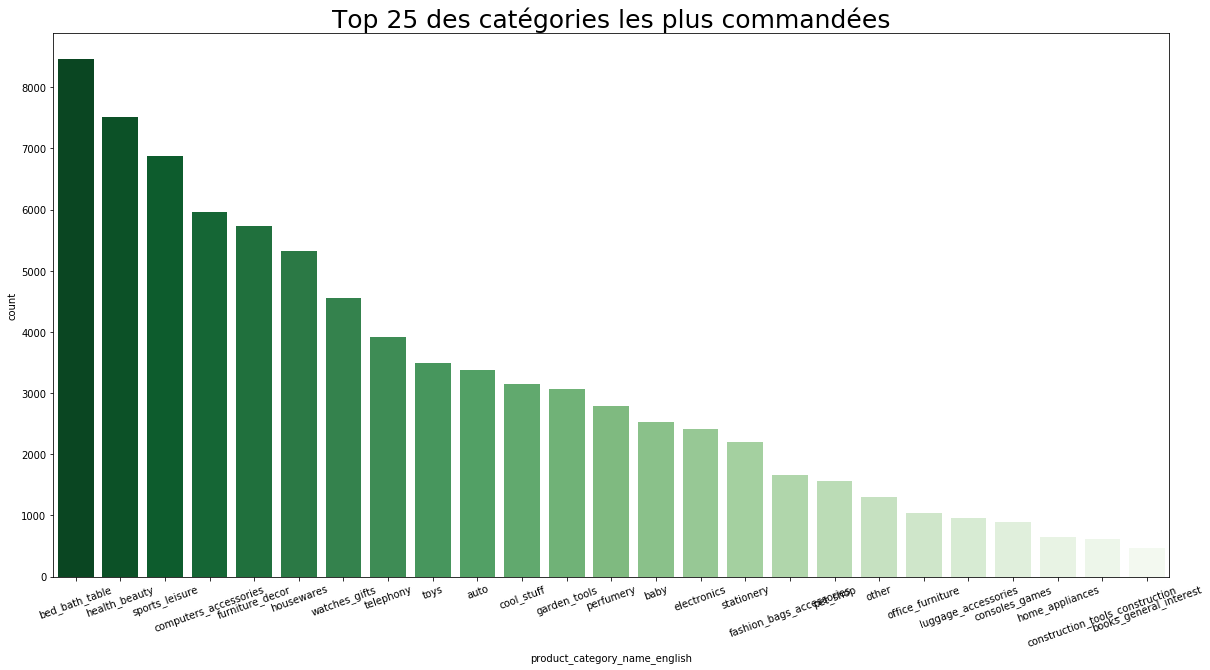

In [30]:
#On observe les 25 premières catégories
fig, ax = plt.subplots(figsize=(20,10))
graph = sns.countplot(x='product_category_name_english', ax=ax, 
                      data=data_exploration[data_exploration['product_category_name_english'].isin(top_25)]
                     ,palette="Greens_r", order=top_25)
graph.set_title('Top 25 des catégories les plus commandées', fontsize=25)
graph.set_xticklabels(ax.get_xticklabels(), rotation=20)
print(graph)

AxesSubplot(0.125,0.125;0.775x0.755)


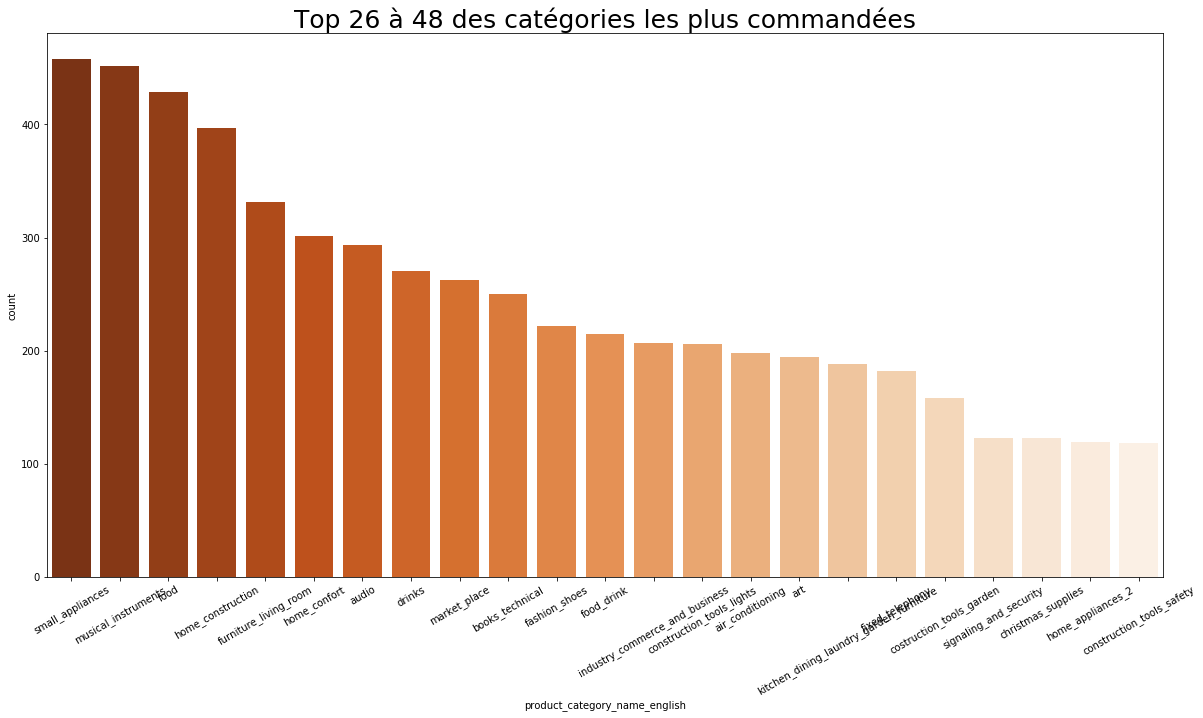

In [31]:
#On observe les 25 catégories suivantes
fig, ax = plt.subplots(figsize=(20,10))
graph = sns.countplot(x='product_category_name_english', ax=ax, 
                      data=data_exploration[data_exploration['product_category_name_english'].isin(top_26_48)]
                     ,palette='Oranges_r', order=top_26_48)
graph.set_title('Top 26 à 48 des catégories les plus commandées', fontsize=25)
graph.set_xticklabels(ax.get_xticklabels(), rotation=30)
print(graph)

AxesSubplot(0.125,0.125;0.775x0.755)


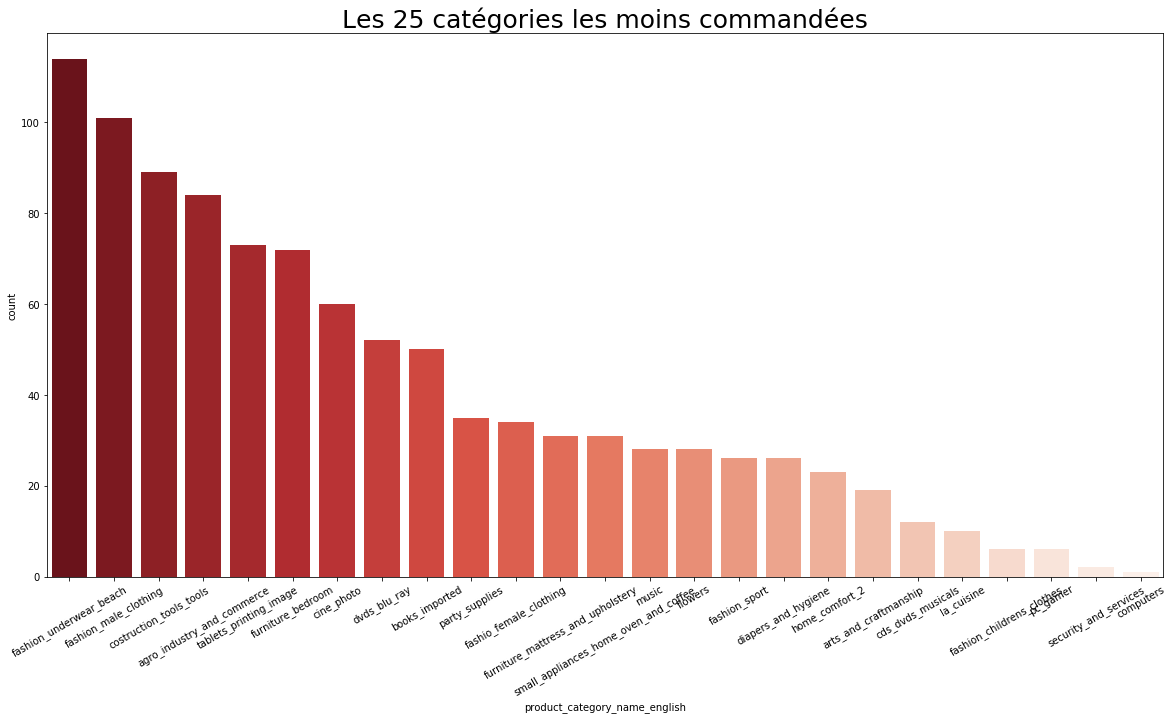

In [32]:
#On observe les 25 dernières catégories
fig, ax = plt.subplots(figsize=(20,10))
graph = sns.countplot(x='product_category_name_english', ax=ax, 
                      data=data_exploration[data_exploration['product_category_name_english'].isin(last_25)]
                     ,palette='Reds_r', order=last_25)
graph.set_title('Les 25 catégories les moins commandées', fontsize=25)
graph.set_xticklabels(ax.get_xticklabels(), rotation=30)
print(graph)

In [33]:
#On sépare les états en 2 pour mieux les visualiser
state_top_10 = data_exploration['customer_state'].value_counts().index[:10]
state_no_top_10 = data_exploration['customer_state'].value_counts().index[10:]

AxesSubplot(0.125,0.125;0.775x0.755)


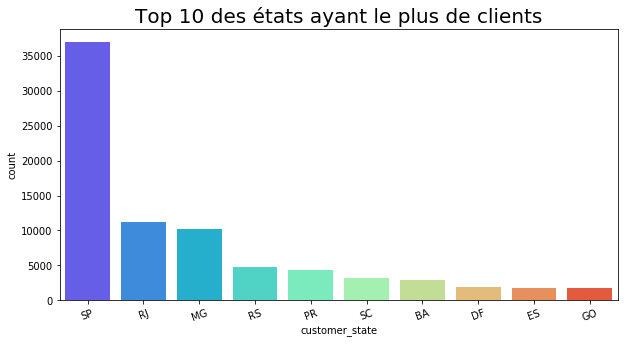

In [34]:
#On observe les états par clients
fig, ax = plt.subplots(figsize=(10,5))
graph = sns.countplot(x='customer_state', ax=ax, 
                      data=data_exploration[data_exploration['customer_state'].isin(state_top_10)],
                      palette="rainbow", order=state_top_10)
graph.set_title('Top 10 des états ayant le plus de clients', fontsize=20)
graph.set_xticklabels(ax.get_xticklabels(), rotation=20)
print(graph)

AxesSubplot(0.125,0.125;0.775x0.755)


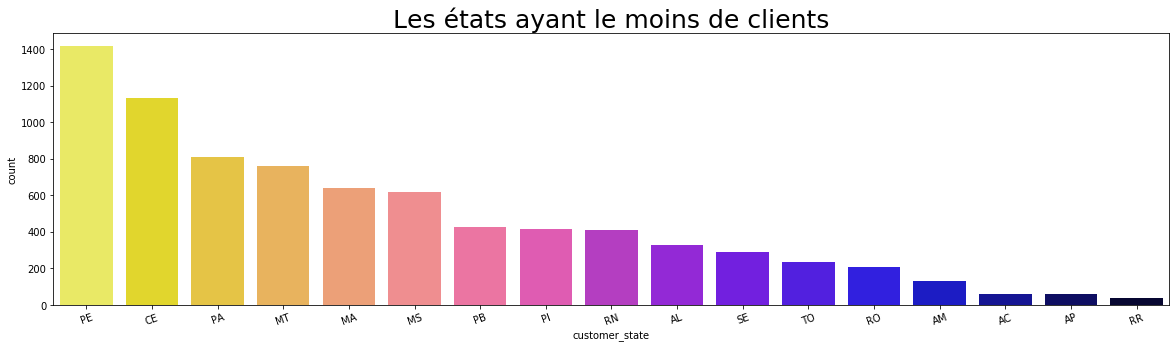

In [35]:
#On observe les états par clients en enlevant les 3 premiers états
fig, ax = plt.subplots(figsize=(20,5))
graph = sns.countplot(x='customer_state', ax=ax, 
                      data=data_exploration[data_exploration['customer_state'].isin(state_no_top_10)],
                      palette="gnuplot2_r", order=state_no_top_10)
graph.set_title('Les états ayant le moins de clients', fontsize=25)
graph.set_xticklabels(ax.get_xticklabels(), rotation=20)
print(graph)

Moyenne:  99.03  Mediane:  79.99  Mode:  59.9  Variance:  4907.87  Ecart-type:  70.06


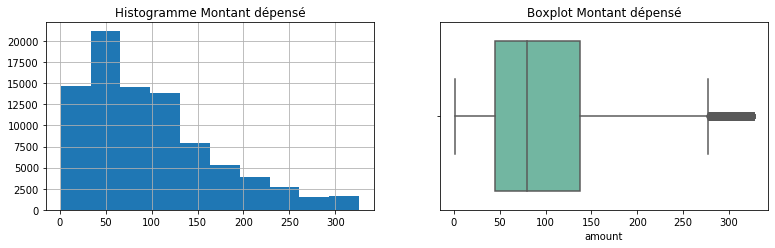

In [36]:
#On observe l'histogramme et le boxplot
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(5,3,1)
data_exploration["amount"].hist()
plt.title("Histogramme Montant dépensé")
ax = fig.add_subplot(5,3,2)
sns.boxplot(x = 'amount', data=data_exploration, orient="h", palette="Set2")
plt.title("Boxplot Montant dépensé")

print("Moyenne: ", round(data_exploration['amount'].mean(),2)
     ," Mediane: ", round(data_exploration["amount"].median(),2)
     ," Mode: ", round(data_exploration["amount"].mode()[0],2)
     ," Variance: ", round(data_exploration["amount"].var(),2)
     ," Ecart-type: ", round(data_exploration["amount"].std(),2))

232.0
Moyenne:  1.18  Mediane:  1.0  Mode:  1  Variance:  0.33  Ecart-type:  0.58


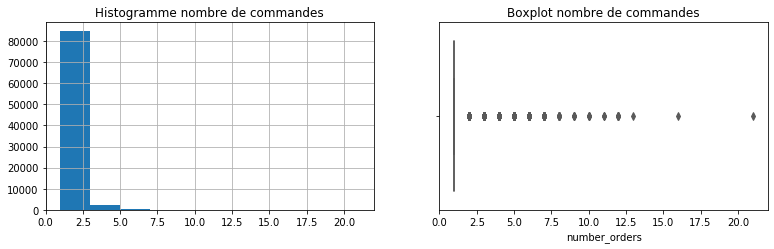

In [37]:
#On observe l'histogramme et le boxplot
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(5,3,1)
data_exploration["number_orders"].hist()
plt.title("Histogramme nombre de commandes")
ax = fig.add_subplot(5,3,2)
sns.boxplot(x = 'number_orders', data=data_exploration, orient="h", palette="Set2")
plt.title("Boxplot nombre de commandes")
print(IQR)

print("Moyenne: ", round(data_exploration['number_orders'].mean(),2)
     ," Mediane: ", round(data_exploration["number_orders"].median(),2)
     ," Mode: ", round(data_exploration["number_orders"].mode()[0],2)
     ," Variance: ", round(data_exploration["number_orders"].var(),2)
     ," Ecart-type: ", round(data_exploration["number_orders"].std(),2))

Moyenne:  242.47  Mediane:  223.0  Mode:  283  Variance:  23245.95  Ecart-type:  152.47


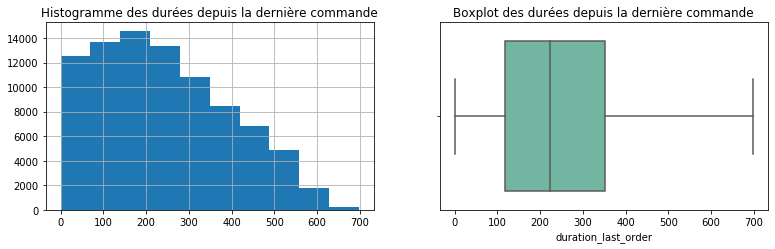

In [38]:
#On observe l'histogramme et le boxplot
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(5,3,1)
data_exploration["duration_last_order"].hist()
plt.title("Histogramme des durées depuis la dernière commande")
ax = fig.add_subplot(5,3,2)
sns.boxplot(x = 'duration_last_order', data=data_exploration, orient="h", palette="Set2")
plt.title("Boxplot des durées depuis la dernière commande")

print("Moyenne: ", round(data_exploration['duration_last_order'].mean(),2)
     ," Mediane: ", round(data_exploration["duration_last_order"].median(),2)
     ," Mode: ", round(data_exploration["duration_last_order"].mode()[0],2)
     ," Variance: ", round(data_exploration["duration_last_order"].var(),2)
     ," Ecart-type: ", round(data_exploration["duration_last_order"].std(),2))

Moyenne:  4.1  Mediane:  5.0  Mode:  5.0  Variance:  1.76  Ecart-type:  1.33


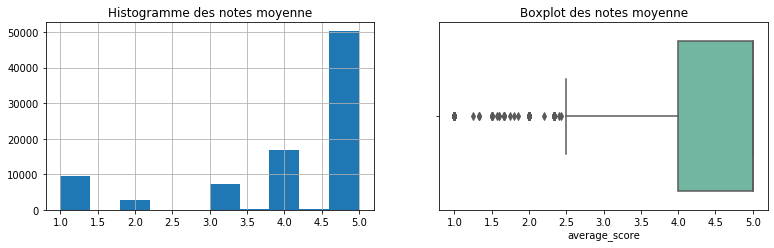

In [39]:
#On observe l'histogramme et le boxplot
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(5,3,1)
data_exploration["average_score"].hist()
plt.title("Histogramme des notes moyenne")
ax = fig.add_subplot(5,3,2)
sns.boxplot(x = 'average_score', data=data_exploration, orient="h", palette="Set2")
plt.title("Boxplot des notes moyenne")

print("Moyenne: ", round(data_exploration['average_score'].mean(),2)
     ," Mediane: ", round(data_exploration["average_score"].median(),2)
     ," Mode: ", round(data_exploration["average_score"].mode()[0],2)
     ," Variance: ", round(data_exploration["average_score"].var(),2)
     ," Ecart-type: ", round(data_exploration["average_score"].std(),2))

Moyenne:  2.68  Mediane:  1.0  Mode:  1.0  Variance:  6.01  Ecart-type:  2.45


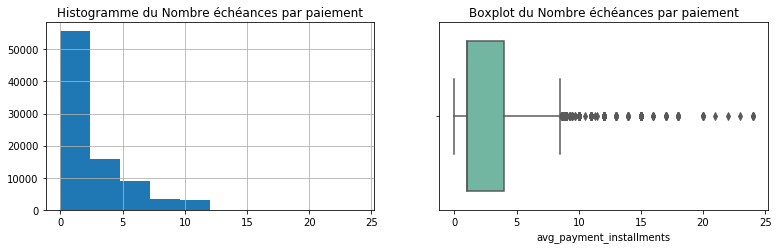

In [40]:
#On observe l'histogramme et le boxplot
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(5,3,1)
data_exploration["avg_payment_installments"].hist()
plt.title("Histogramme du Nombre échéances par paiement")
ax = fig.add_subplot(5,3,2)
sns.boxplot(x = 'avg_payment_installments', data=data_exploration, orient="h", palette="Set2")
plt.title("Boxplot du Nombre échéances par paiement")

print("Moyenne: ", round(data_exploration['avg_payment_installments'].mean(),2)
     ," Mediane: ", round(data_exploration["avg_payment_installments"].median(),2)
     ," Mode: ", round(data_exploration["avg_payment_installments"].mode()[0],2)
     ," Variance: ", round(data_exploration["avg_payment_installments"].var(),2)
     ," Ecart-type: ", round(data_exploration["avg_payment_installments"].std(),2))

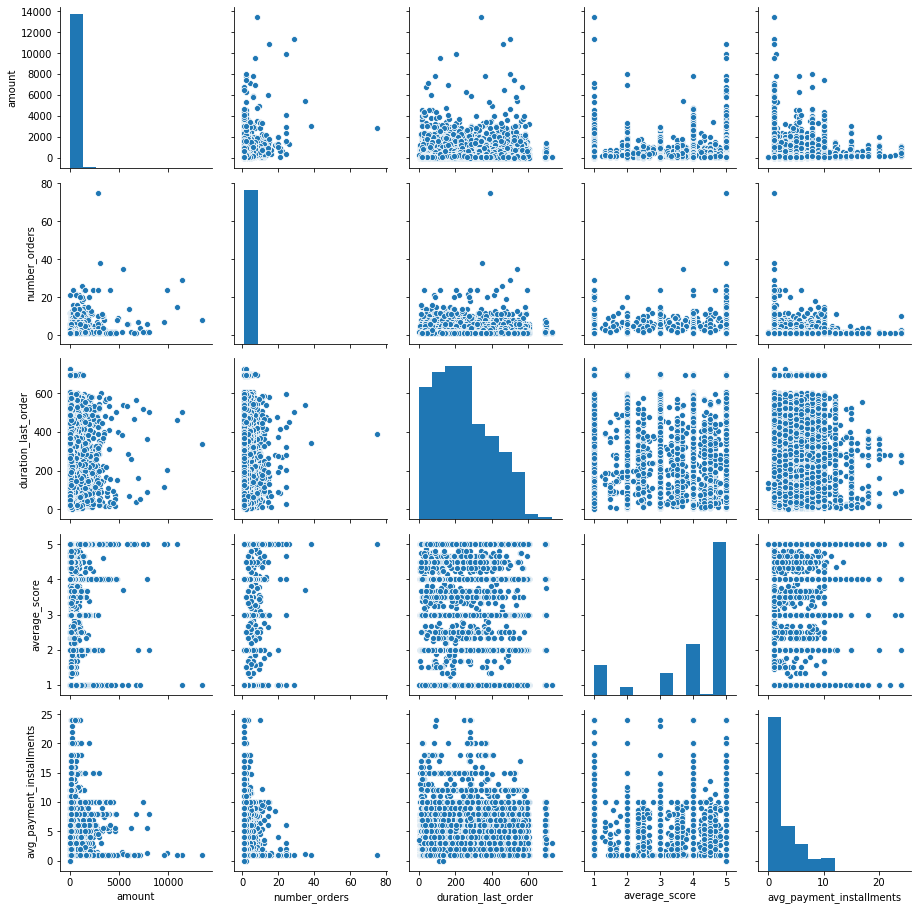

In [41]:
#On observe la distribution sur le dataframe sans transformation
sns.pairplot(data_optimized)

In [42]:
#On applique le log sur nos valeurs pour mieux les distribuer
data_optimized.loc[data_optimized['avg_payment_installments'] <= 0, 'avg_payment_installments'] = 1
data_optimized.loc[data_optimized['duration_last_order'] <= 0, 'duration_last_order'] = 1

data_optimized_log = data_optimized.copy()
data_optimized_log["amount"] = np.log(data_optimized_log["amount"])
data_optimized_log["number_orders"] = np.log(data_optimized_log["number_orders"])
data_optimized_log["duration_last_order"] = np.log(data_optimized_log["duration_last_order"])
data_optimized_log["avg_payment_installments"] = np.log(data_optimized_log["avg_payment_installments"])
data_optimized_log.head(5)

,customer_unique_id,amount,number_orders,product_id,last_order_purchase_timestamp,duration_last_order,customer_state,review_comment_message,average_score,avg_payment_installments,product_category_name_english
0,0000366f3b9a7992bf8c76cfdf3221e2,4.866765,0.0,372645c7439f9661fbbacfd129aa92ec,2018-05-10 10:56:27,4.753590,SP,"Adorei a cortina, ficou linda na minha sala, e...",5.0,2.079442,bed_bath_table
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2.939162,0.0,5099f7000472b634fea8304448d20825,2018-05-07 11:11:27,4.779123,SP,NaN,4.0,0.000000,health_beauty
2,0000f46a3911fa3c0805444483337064,4.234107,0.0,64b488de448a5324c4134ea39c28a34b,2017-03-10 21:05:03,6.293419,SC,NaN,3.0,2.079442,stationery
3,0000f6ccb0745a6a4b88665a16c9f078,3.257712,0.0,2345a354a6f2033609bbf62bf5be9ef6,2017-10-12 20:29:41,5.783825,PA,Bom vendedor,4.0,1.386294,telephony
4,0004aac84e0df4da2b147fca70cf8255,5.192957,0.0,c72e18b3fe2739b8d24ebf3102450f37,2017-11-14 19:45:42,5.676754,SP,NaN,5.0,1.791759,telephony


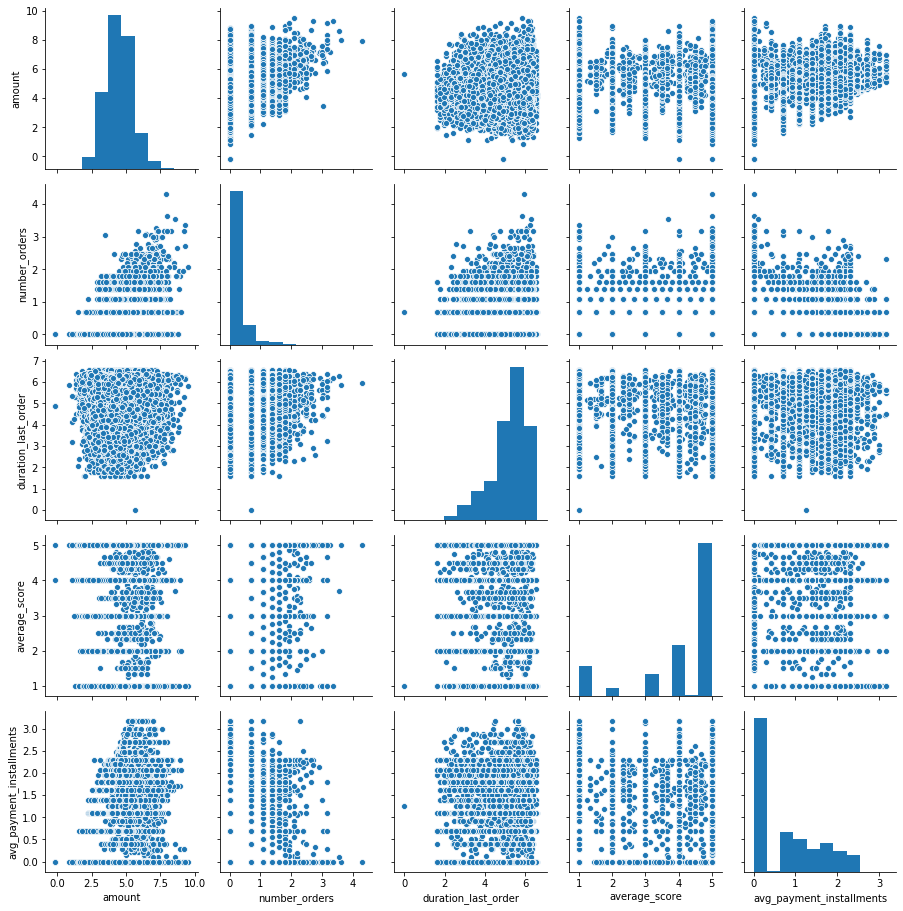

In [43]:
#On observe la distribution sur le dataframe une fois le log appliqué
sns.pairplot(data_optimized_log)

In [44]:
#Centrage est réduction
data_optimized_std = data_optimized_log[["amount","number_orders","duration_last_order"
                                        ,"average_score","avg_payment_installments"]].copy()
std_scale = preprocessing.StandardScaler().fit(data_optimized_std)
data_optimized_std = std_scale.transform(data_optimized_std)

data_optimized_std = pd.DataFrame(data=data_optimized_std, columns=["amount","number_orders","duration_last_order"
                                                                    ,"average_score","avg_payment_installments"])

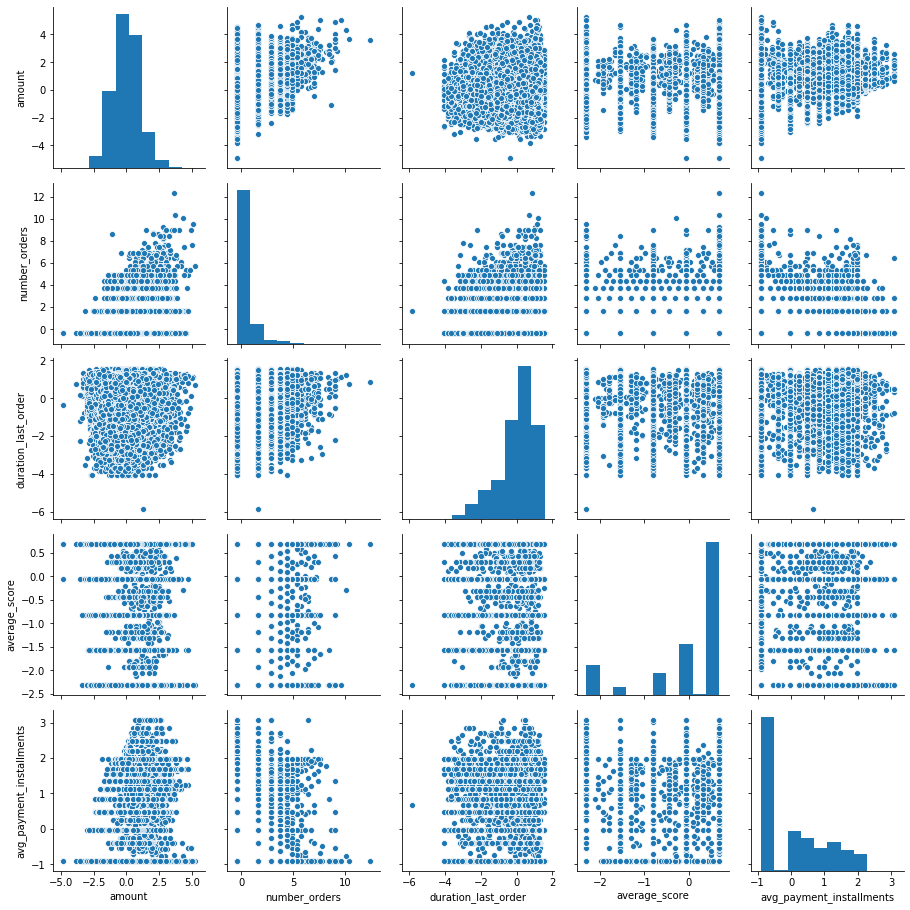

In [45]:
#On observe la distribution sur le dataframe une fois log appliqué et une fois qu'il a été centré réduit
sns.pairplot(data_optimized_std)

In [46]:
#On enregistre le dataframe optimisé pour l'utiliser pour nos modèles
data_optimized.to_csv("data_optimized.csv")
data_optimized_std.to_csv("data_optimized_std.csv")